In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
df= pd.read_csv('../csv/after_cleaning/final.csv')
df.head()

,delegation,superficie,chambres,salle_de_bains,etat,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,21.0,62,1,1,10,1,0.0,0.0,0.0,1.0,259532.0
1,32.0,300,2,1,10,5,0.0,0.0,0.0,1.0,1208100.0
2,26.0,142,1,1,11,1,1.0,0.0,0.0,0.0,707302.0
3,29.0,281,3,2,11,8,0.0,0.0,0.0,1.0,1255227.0
4,26.0,153,1,1,10,1,1.0,0.0,0.0,0.0,687429.0


**train test split**

NOTE: Tree-based models are not affected by the scale of features because they split based on feature thresholds

In [3]:
X= df.drop(columns='prix')

y= df['prix']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

**parameters tuning**

In [13]:

# Hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_estimators': [10, 50, 100, 200]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1156 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best CV score: 0.7234079349277442


In [6]:
model= RandomForestRegressor(**grid_search.best_params_, oob_score= True)
model.fit(X_train, y_train)

y_hat= model.predict(X_test)

In [7]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
mape=mean_absolute_percentage_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 95491.38704008085
Root Mean Squared Error (RMSE): 148934.99417648333
Mean Squared Error (MSE): 22181632490.349125
Mean Absolute Percentage Error (MAPE): 0.21187812416593946
R²: 0.7690476965125956


In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("===== Training Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n===== Testing Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


===== Training Metrics =====
Mean Absolute Error (MAE): 75473.2850
Root Mean Squared Error (RMSE): 145937.9633
Mean Squared Error (MSE): 21297889133.0824
Mean Absolute Percentage Error (MAPE): 0.1626
R²: 0.8348

===== Testing Metrics =====
Mean Absolute Error (MAE): 95491.3870
Root Mean Squared Error (RMSE): 148934.9942
Mean Squared Error (MSE): 22181632490.3491
Mean Absolute Percentage Error (MAPE): 0.2119
R²: 0.7690


**R² is around 77% , this means that model explains about 77% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

**cross validation**

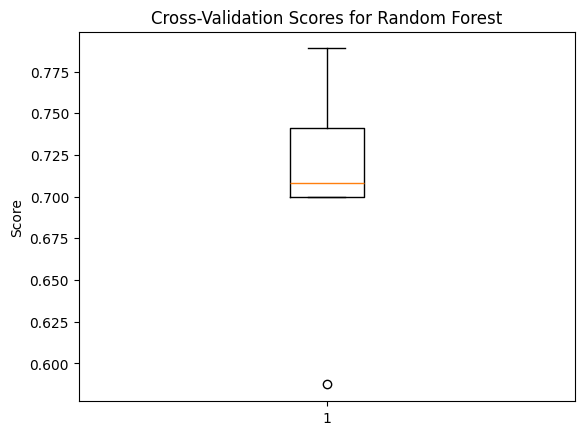

Average CV Score: 0.7050803029181404


In [9]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Plotting the cross-validation scores
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores for Random Forest')
plt.ylabel('Score')
plt.show()

print(f'Average CV Score: {cv_scores.mean()}')


**around 70% accuracy**

**OOB: out of bag error**

In [11]:
# OOB error score
print(f"OOB Score: {model.oob_score_}")

OOB Score: 0.7060734760598328


**learning curve**

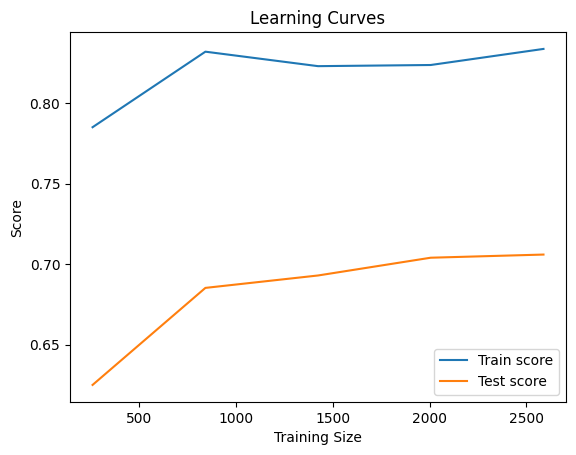

In [12]:

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


The test score starts low but increases as the training size increases, which suggests that adding more data improves generalization.
 
There is still a noticeable gap between train and test scores, indicating that the model may be slightly overfitting.
